# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.manifold import TSNE
seed = 0

In [2]:
data = pd.read_csv('data/SpotifyFeatures.csv')

In [3]:
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
50721,Blues,Jethro Tull,Too Old to Rock 'n' Roll: Too Young to Die! - ...,5UEWQ5Zh27nmKnSb2eJhll,40,0.01530,0.456,334027,0.459,0.000000,C,0.139,-10.720,Major,0.0288,77.405,4/4,0.468
71157,Blues,Buddy Guy,One Day Away,15e3leRc1c26oStnjjiex6,26,0.52500,0.523,224280,0.695,0.000009,A,0.168,-5.947,Major,0.0333,170.105,4/4,0.467
68468,Hip-Hop,Craig Mack,"Flava in Ya Ear Remix (feat. Notorious B.I.G.,...",5PbFD3AIyunz5HxocduA9e,64,0.27200,0.520,302013,0.847,0.000000,A,0.325,-5.300,Major,0.4270,177.371,4/4,0.799
173724,Comedy,Josh Blue,The Apple Pipe & The Police,1AisHGciZvLcNKgXxwpEVa,16,0.89400,0.523,211812,0.751,0.000002,F,0.769,-13.452,Major,0.9460,75.921,4/4,0.202
90664,Hip-Hop,Denzel Curry,Equalizer,5GC39eRKcLeYTS3jMIAJOj,51,0.00308,0.768,169180,0.536,0.000805,C#,0.091,-5.630,Major,0.0510,122.005,4/4,0.357


In [4]:
def score(popularity: int) -> int:
    if (popularity < 15):
        return 3 #"Very popular"
    elif (popularity < 35):
        return 2 #"Popular"
    elif (popularity < 65):
        return 1 #"Regular"
    else:
        return 0 #"Almost unknown"

data.insert(5, "categorized popularity", data.popularity.apply(score))

In [5]:
short_data = data.sample(30000, random_state = seed)
short_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 134848 to 213257
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genre                   30000 non-null  object 
 1   artist_name             30000 non-null  object 
 2   track_name              30000 non-null  object 
 3   track_id                30000 non-null  object 
 4   popularity              30000 non-null  int64  
 5   categorized popularity  30000 non-null  int64  
 6   acousticness            30000 non-null  float64
 7   danceability            30000 non-null  float64
 8   duration_ms             30000 non-null  int64  
 9   energy                  30000 non-null  float64
 10  instrumentalness        30000 non-null  float64
 11  key                     30000 non-null  object 
 12  liveness                30000 non-null  float64
 13  loudness                30000 non-null  float64
 14  mode                    30000 no

In [6]:
X = short_data[['acousticness', 'instrumentalness', 'liveness', 'danceability', 'energy', 
                'speechiness', 'tempo', 'valence', 'duration_ms']]
y = short_data['categorized popularity']

In [7]:
tsne = TSNE(n_components = 2, random_state = seed, n_jobs = 6)
X_reduced = tsne.fit_transform(X)

Projecting 9-dimensional data to 2D


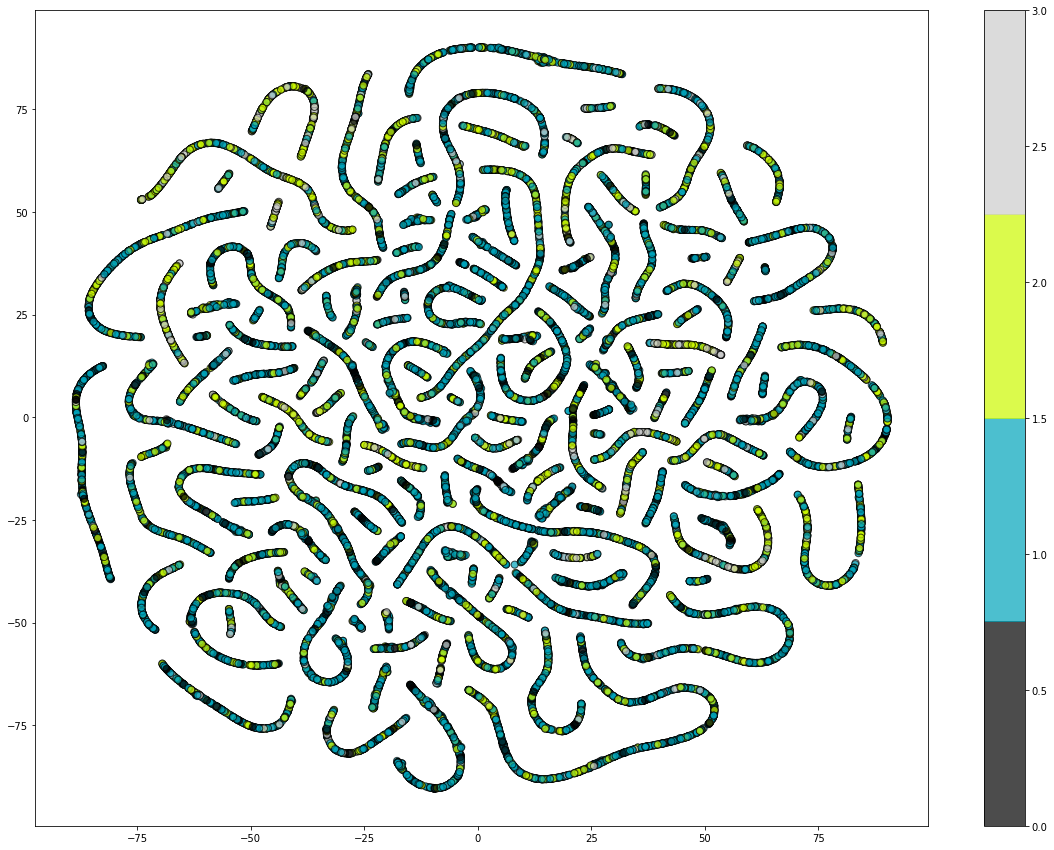

In [8]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(20,15))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, 
            edgecolor = 'k', alpha = 0.7, s = 50,
            cmap = plt.cm.get_cmap('nipy_spectral', 4))
plt.colorbar()
plt.show()

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
y_pred4 = KMeans(n_clusters = 4, random_state = seed, algorithm = 'full').fit_predict(X_reduced)

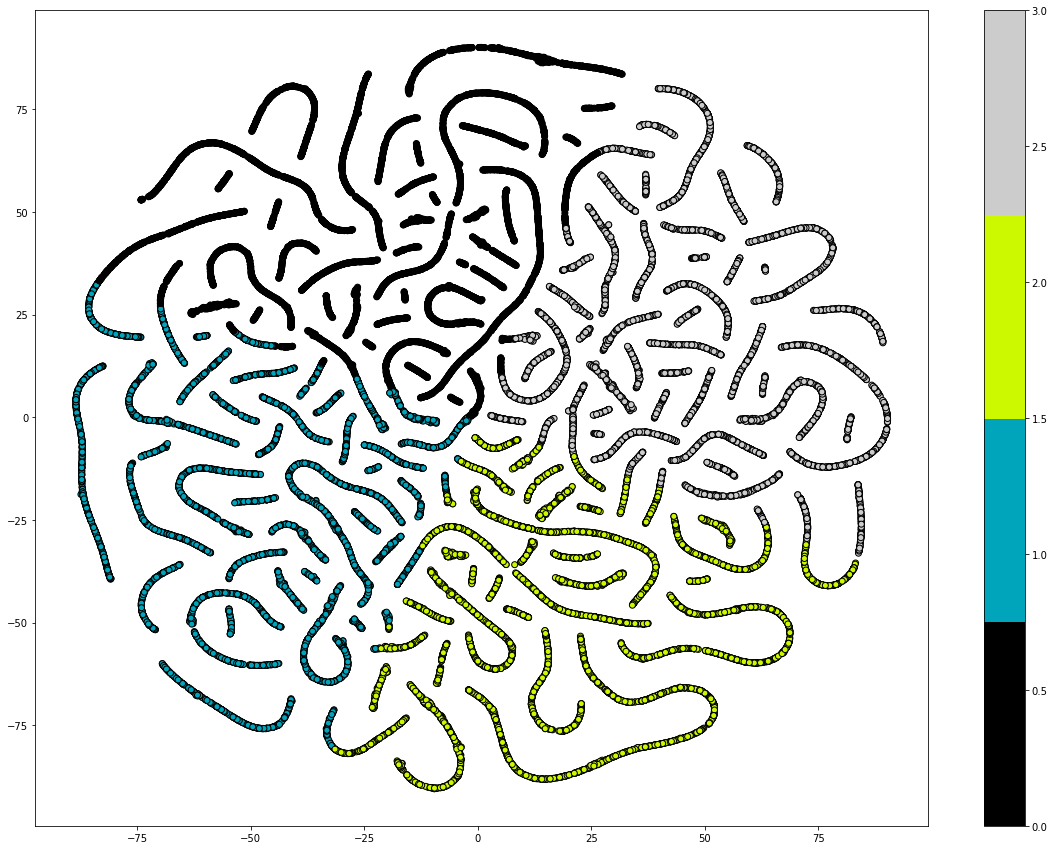

In [11]:
plt.figure(figsize = (20,15))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_pred4, 
            cmap = plt.cm.get_cmap('nipy_spectral', 4), 
            edgecolor = 'k') 
plt.colorbar()
plt.show()

In [12]:
y_filtered = []
y_zipped = []
for i in range (4):
    curr_y = list(zip(X_reduced[y_pred4 == i], y_pred4[y_pred4 == i]))
    y_zipped.append(curr_y)
    y_filtered.append([item[0] for item in curr_y])
for i in range(4):
    for item, j in zip(y_zipped[i], range(5)):
        print(item)

(array([-5.153655, 31.508087], dtype=float32), 0)
(array([19.61224 , 55.065247], dtype=float32), 0)
(array([-56.68964 ,  40.608196], dtype=float32), 0)
(array([19.752102, 55.824554], dtype=float32), 0)
(array([-0.17483453, 70.08158   ], dtype=float32), 0)
(array([-38.550617, -27.947588], dtype=float32), 1)
(array([-60.64908, -43.89428], dtype=float32), 1)
(array([-23.29831  ,   1.7939721], dtype=float32), 1)
(array([-85.64052 ,  25.814081], dtype=float32), 1)
(array([-38.49303,   6.12234], dtype=float32), 1)
(array([ 12.509095, -66.405045], dtype=float32), 2)
(array([ -7.704442, -57.87772 ], dtype=float32), 2)
(array([ 15.540217, -59.71254 ], dtype=float32), 2)
(array([ -3.5588322, -10.788773 ], dtype=float32), 2)
(array([  7.023311, -54.87951 ], dtype=float32), 2)
(array([22.352568 ,  5.4136057], dtype=float32), 3)
(array([59.044197, 13.149801], dtype=float32), 3)
(array([60.406456, 15.652106], dtype=float32), 3)
(array([13.921383, 14.523731], dtype=float32), 3)
(array([ 5.8129745 , -

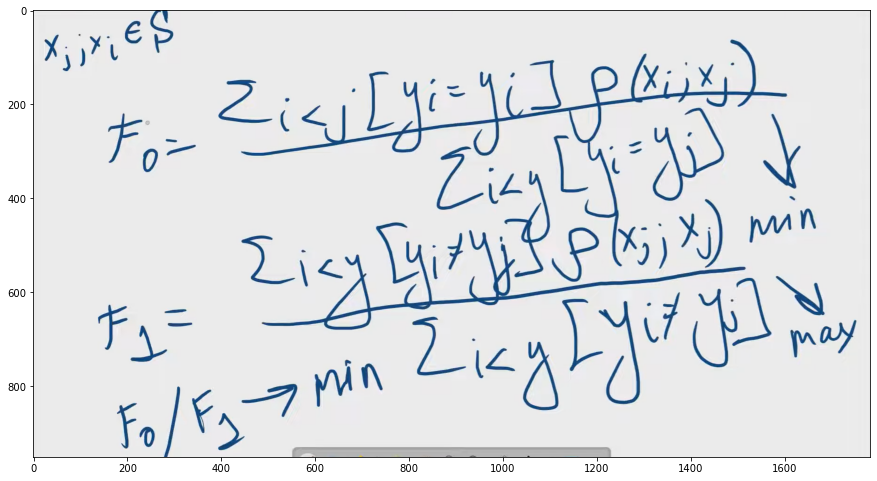

In [13]:
plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('data/lecture_screen.png'))
plt.show()

In [14]:
from math import hypot

def dist(p1, p2) -> float:
    return hypot(p2[0] - p1[0], p2[1] - p1[1])

def inner_cluster (filtered) -> float:
    n_clusters = len(filtered)
    dist_sum = 0.0
    cnt = 0
    for c in range(n_clusters):
        Xs = filtered[c]
        for j in range (len(Xs)):
            for i in range(j):
                dist_sum += dist(Xs[i], Xs[j])
                cnt += 1
    return dist_sum / cnt

def inter_cluster (filtered) -> float:
    n_clusters = len(filtered)
    dist_sum = 0.0
    cnt = 0
    for c2 in range(n_clusters):
        for c1 in range(c2):
            Xs1 = filtered[c1]
            Xs2 = filtered[c2]
            for i in range(len(Xs1)):
                for j in range(len(Xs2)):
                    dist_sum += dist(Xs1[i], Xs2[j])
                    cnt += 1
    return dist_sum / cnt

In [15]:
inner = inner_cluster(y_filtered)

In [16]:
inter = inter_cluster(y_filtered)

In [17]:
print("Mean incluster distance for 4 clusters: ", inner)
print("Mean intercluster distance for 4 clusters:", inter)
print("Incluster / intercluster for 4 clusters: ", inner / inter)

Mean incluster distance for 4 clusters:  42.47089726697271
Mean intercluster distance for 4 clusters: 90.55854398388327
Incluster / intercluster for 4 clusters:  0.46898829639455414


In [18]:
#https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
print("Silhouette score for 4 clusters: ", silhouette_score(X_reduced, y_pred4))

Silhouette score for 4 clusters:  0.3501739
